In [136]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from IPython.display import clear_output

In [137]:
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

In [138]:
def predict(data):
    test = pd.DataFrame([data], columns = ['ds']) 
    val = model.predict(test)
    return np.exp(val['yhat'])

In [139]:
def plot():
    clear_output(wait=True)
    plt.figure(figsize=(12,5))
    plt.plot(x, y) 
    plt.xlabel('DateTime') 
    plt.ylabel('Predicted Value') 
    plt.title('Prediction over a time period') 
    plt.show() 

In [140]:
x = []
y = []

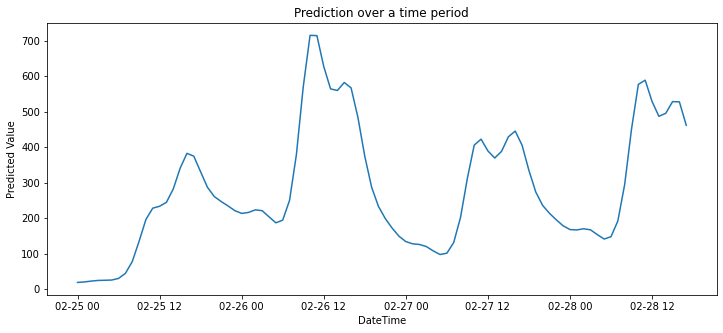

KeyboardInterrupt: 

In [141]:
def runDay(date,secSteps):    
    startDay = date.replace(hour= 0, minute= 0, second= 0)
    endDay   = date.replace(hour=23, minute=59, second=59)
    day = startDay
    while day <= endDay:
        x.append(day)
        val = predict(day)
        y.append(val)
#         print(day,val)
        plot()
        day += datetime.timedelta(seconds=secSteps)

firstDate = datetime.datetime(2019,2,25,0,0,0)
lastDate  = datetime.datetime(2019,3,26,0,0,0)
daySteps  = 1
secSteps = 3600

date = firstDate
while date <= lastDate:
    NumberOfDay = date.timetuple()[7]
    runDay(date,secSteps)
    date += datetime.timedelta(days=daySteps)